MNE: Source estimation and localization
=======================================

Author: Hadi Zaatiti <hadi.zaatiti@nyu.edu>

A Boundary Element Model (BEM) is a computational model used primarily in the field of neuroimaging, especially in magnetoencephalography (MEG) and electroencephalography (EEG), to help solve the forward problem, which involves calculating the electric or magnetic fields generated by neuronal activity in the brain at the sensors located on the scalp.

The NYUAD MRI lab will provide the MRI T1w scans of the participant, with segmentation of the different parts of the brain and different volumetry and other `freesurfer` analysis.

An example of such data is available under NYU BOX, [https://nyu.box.com/v/meg-datafiles](https://nyu.box.com/v/meg-datafiles)
Access the directory: `Box\MEG\Data\resting-state\sub-01\anat`

Requirements:
Having ran `mne kit2fiff` and `mne coreg` as explained previously

Generating the BEM
------------------

We will now compute and plot the BEM model for the participant. Set the freesurfer SUBJECTS_DIR to `Box\MEG\Data\resting-state\sub-01\anat\outputs\PostFreeSurfer\T1w\Sub-0037`  where `Sub-0037` is the MRI ID of the subject.

Note that the ID in MEG for a participant are different than the ID in MRI.

Generate the head surfaces files using the command

You should see the following output

..  code-block:: none

    INFO: log file is /home/USERNAME/freesurferproject/subjects//sub-0037/scripts/mkheadsurf.log
    --------------------------------
    Wed May  8 15:15:41 +04 2024
    /home/USERNAME/freesurferproject/subjects/sub-0037
    mri_seghead --invol /home/USERNAME/freesurferproject/subjects//sub-0037/mri/T1.mgz --outvol /home/USERNAME/freesurferproject/subjects//sub-0037/mri/seghead.mgz --fill 1 --thresh1 20 --thresh2 20 --nhitsmin 2 --rescale --fill-holes-islands
    --------------------------------
    input volume:  /home/USERNAME/freesurferproject/subjects//sub-0037/mri/T1.mgz
    output volume: /home/USERNAME/freesurferproject/subjects//sub-0037/mri/seghead.mgz
    threshold1:    20
    threshold2:    20
    nhitsmin:      2
    fill value:    1
    Loading input volume
    Changing type, rescale = 1, fhi=0.999
    Filling Columns
    Filling Rows
    Filling Slices
    Merging
    nhits = 2546749
    Removing islands
    MRIremoveVolumeIslands() thresh=0.5, nKeep=1, nclusters = 35
    Removing Volume Holes
    MRIremoveVolumeHoles() thresh=0.5, nKeep=1
    MRIremoveVolumeIslands() thresh=0.5, nKeep=1, nclusters = 1
    Filling axial Slice Holes
    ostr LIA
    slicedir 6 slicediruse 2
    slicedim 256 1 256
    MRIremoveSliceHodes() removed 35899 voxels
    Filling sag Slice Holes
    ostr LIA
    slicedir 4 slicediruse 1
    slicedim 1 256 256
    MRIremoveSliceHodes() removed 3538 voxels
    Filling cor Slice Holes
    slicedir 2 slicediruse 2
    slicedim 256 1 256
    MRIremoveSliceHodes() removed 0 voxels
    Counting
    N Head Voxels = 2585413
    N Back Voxels = 14191803
    Avg. Back Intensity = 1.097717
    Max. Back Intensity = 205.000000
    Writing output
    Done
    
    constructing final surface...
    (surface with 291644 faces and 145822 vertices)...done
    computing the maximum edge length...1.414214 mm
    reversing orientation of faces...
    checking orientation of surface...
    0.000 % of the vertices (0 vertices) exhibit an orientation change
    
    counting number of connected components...
       145822 voxel in cpt #1: X=0 [v=145822,e=437466,f=291644] located at (1.178080, 5.080982, -25.954636)
    For the whole surface: X=0 [v=145822,e=437466,f=291644]
    One single component has been found
    nothing to do
    writing out surface...done
    --------------------------------
    Wed May  8 15:15:59 +04 2024
    /home/USERNAME/freesurferproject/subjects/sub-0037
    mris_smooth -n 10 -nw /home/USERNAME/freesurferproject/subjects/sub-0037/surf/lh.seghead /home/USERNAME/freesurferproject/subjects/sub-0037/surf/lh.seghead
    --------------------------------
    smoothing for 10 iterations
    smoothing surface tessellation for 10 iterations...
    smoothing complete - recomputing first and second fundamental forms...
    Started at: Wed May 8 15:15:41 +04 2024
    Ended   at: Wed May  8 15:16:01 +04 2024
    mkheadsurf done

The command will generate the head segmentation file  `mri\seghead.mgz`

We will now generate the boundary for the brain, the inner skull and outer skull and skin

`mne watershed_bem --subject sub-0037`

You should the following output

..  code-block:: none

    Running mri_watershed for BEM segmentation with the following parameters:
    
    Results dir = /home/USERNAME/freesurferproject/subjects/sub-0037/bem/watershed
    Command = mri_watershed -useSRAS -surf /home/USERNAME/freesurferproject/subjects/sub-0037/bem/watershed/sub-0037 /home/USERNAME/freesurferproject/subjects/sub-0037/mri/T1.mgz /home/USERNAME/freesurferproject/subjects/sub-0037/bem/watershed/ws
    
    Running subprocess: mri_watershed -useSRAS -surf /home/USERNAME/freesurferproject/subjects/sub-0037/bem/watershed/sub-0037 /home/USERNAME/freesurferproject/subjects/sub-0037/mri/T1.mgz /home/USERNAME/freesurferproject/subjects/sub-0037/bem/watershed/ws
    
    Mode:          use surfaceRAS to save surface vertex positions
    Mode:          Saving out BEM surfaces
    
    *********************************************************
    The input file is /home/USERNAME/freesurferproject/subjects/sub-0037/mri/T1.mgz
    The output file is /home/USERNAME/freesurferproject/subjects/sub-0037/bem/watershed/ws
    
    *************************WATERSHED**************************
    Sorting...
          T1-weighted MRI image
          modification of the preflooding height to 15 percent
          Count how many 110 voxels are present :  263997
    
          Find the largest 110-component...
                 heap usage = 468888 Kbytes.
                 removing small segments (less than 1 percent of maxarea).done
          And identify it as the main brain basin...done
          Main component: 244657 voxels
          first estimation of the COG coord: x=125 y=137 z=127 r=70
          first estimation of the main basin volume: 1464330 voxels
          global maximum in x=113, y=115, z=93, Imax=255
          CSF=15, WM_intensity=110, WM_VARIANCE=5
          WM_MIN=110, WM_HALF_MIN=110, WM_HALF_MAX=110, WM_MAX=110
          preflooding height equal to 15 percent
    done.
    Analyze...
    
          main basin size= 1453495 voxels, voxel volume =1.000
                         = 1453495 mmm3 = 1453.495 cm3
    done.
    PostAnalyze...
          ***** 0 basin(s) merged in 1 iteration(s)
          ***** 0 voxel(s) added to the main basin
    done.
    
    ****************TEMPLATE DEFORMATION****************
    
          second estimation of the COG coord: x=127,y=140, z=126, r=9052 iterations
    ^^^^^^^^ couldn't find WM with original limits - expanding ^^^^^^
    
       GLOBAL      CSF_MIN=0, CSF_intensity=5, CSF_MAX=19 , nb = 43452
     Problem with the least square interpolation in GM_MIN calculation.
    
                         CSF_MAX  TRANSITION  GM_MIN  GM
        GLOBAL
      before analyzing :    19,      37,        59,   76
      after  analyzing :    19,      51,        59,   57
          mri_strip_skull: done peeling brain
          highly tesselated surface with 10242 vertices
          matching...66 iterations
    
    *********************VALIDATION*********************
    curvature mean = -0.014, std = 0.011
    curvature mean = 67.170, std = 7.285
    
    No Rigid alignment: -atlas Mode Off (basic atlas / no registration)
          before rotation: sse = 5.20, sigma = 8.02
          after  rotation: sse = 5.20, sigma = 8.02
    Localization of inacurate regions: Erosion-Dilation steps
          the sse mean is  5.43, its var is  7.01
          before Erosion-Dilatation  1.89% of inacurate vertices
          after  Erosion-Dilatation  0.00% of inacurate vertices
          Validation of the shape of the surface done.
    Scaling of atlas fields onto current surface fields
    
    ********FINAL ITERATIVE TEMPLATE DEFORMATION********
    Compute Local values csf/gray
    Fine Segmentation...41 iterations
    
    
          mri_strip_skull: done peeling brain
    
    Brain Size = 1454766 voxels, voxel volume = 1.000 mm3
               = 1454766 mmm3 = 1454.766 cm3
    
          outer skin surface matching...119 iterations
    
    ******************************
    Saving /home/USERNAME/freesurferproject/subjects/sub-0037/bem/watershed/ws
    done
    mri_watershed done
    error: unknown file type for file (/home/USERNAME/freesurferproject/subjects/sub-0037/bem/watershed/ws)
    Overwriting existing file.
    Overwriting existing file.
    Overwriting existing file.
    Overwriting existing file.
    Symbolic links to .surf files created in bem folder
    
    Thank you for waiting.
    The BEM triangulations for this subject are now available at:
    /home/USERNAME/freesurferproject/subjects/sub-0037/bem.
    outer skin  CM is   1.20  -0.97 -16.05 mm
    Surfaces passed the basic topology checks.
    Created /home/USERNAME/freesurferproject/subjects/sub-0037/bem/sub-0037-head.fif
    
    Complete.

You should see the following files in your subject directory
- the brain boundary `bem\brain.surf`
- the inner skull boundary `bem\inner_skull.surf`
- the outer skull boundary `bem\outer_skull.surf`
- the outer skin boundary `bem\outer_skin.surf`

A `sub-0037-head.fif` file should be generated aswell in the `bem` folder.
Note that for MEG, the inner skull boundary would be enough to do source localization and estimation. However, for EEG 3 layers (inner skull, outer skull, and skin) are typically used.
Let us now plot the boundaries that we generated using MNE.

Plotting the BEM for visual inspection
--------------------------------------
Let us now plot the boundaries that we generated using MNE

In [1]:
%matplotlib inline
import mne

    1 BEM surfaces found
    Reading a surface...
[done]
    1 BEM surfaces read
Using surface: C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\bem\inner_skull.surf
Using surface: C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\bem\outer_skull.surf
Using surface: C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\bem\outer_skin.surf


C:\ProgramData\mne-python\1.6.1_0\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


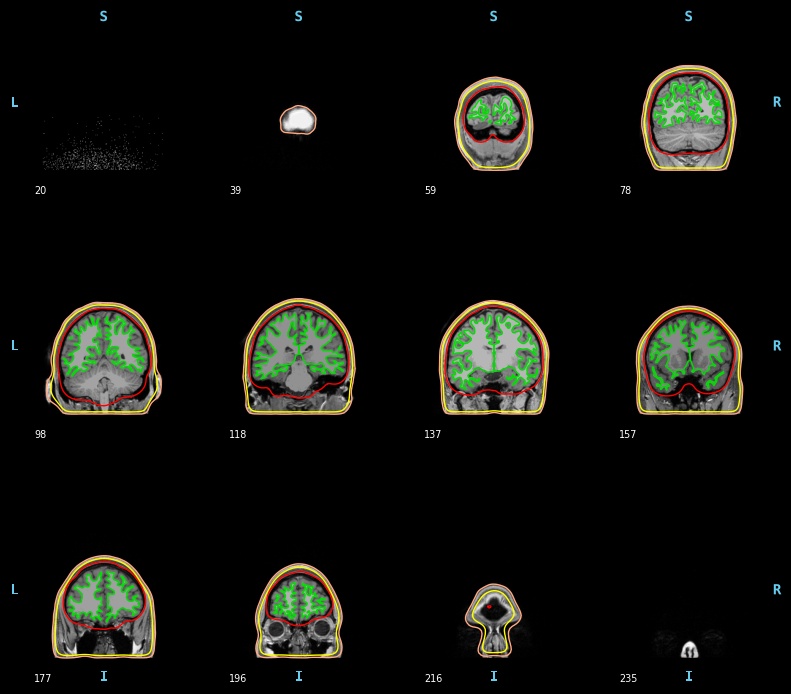

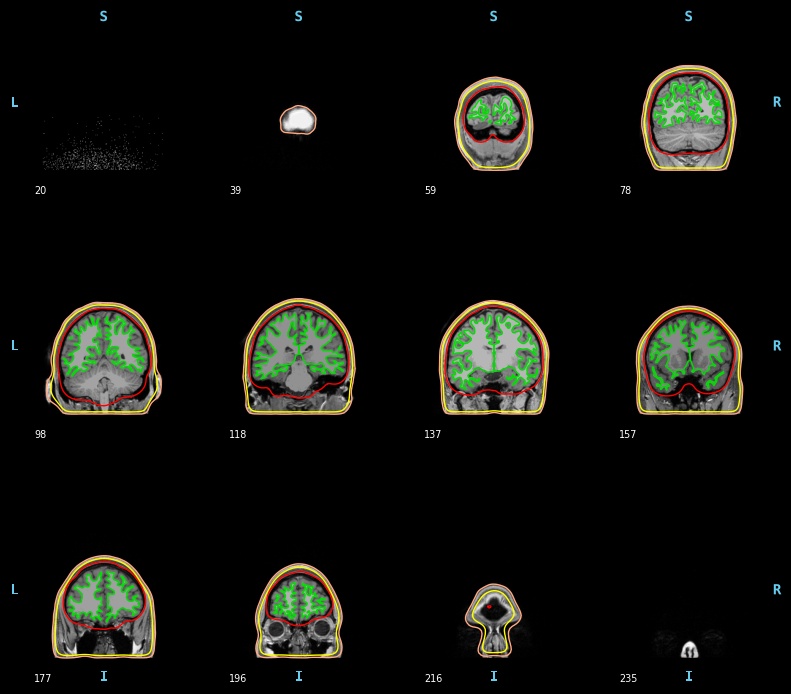

In [2]:
fif_path = r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\Sub-0037\bem\sub-0037-head.fif'

# Load the BEM surfaces from the generated .fif file
bem_surfaces = mne.read_bem_surfaces(fif_path)

# Plot the BEM surfaces
mne.viz.plot_bem(subject='sub-0037', 
                 subjects_dir=r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w',
                 brain_surfaces='white', 
                 src=None, 
                 orientation='coronal')

Source localization and estimation
----------------------------------
Generating source space, refers to the process of creating a model of where in the brain the magnetic fields are being generated from. This model is essential for solving the inverse problem, which involves estimating the neuronal activity that causes the measured magnetic fields on the scalp.


In [3]:
import mne
subject='sub-0037'
subjects_dir=r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w'

source_space = mne.setup_source_space(subject,spacing='ico4',subjects_dir=subjects_dir)                 

source_space.save(subjects_dir+'/%s/bem/%s-ico4-src.fif' %(subject,subject), overwrite=True)

Setting up the source space with the following parameters:

SUBJECTS_DIR = C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w
Subject      = sub-0037
Surface      = white
Icosahedron subdivision grade 4

>>> 1. Creating the source space...

Doing the icosahedral vertex picking...
Loading C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\surf\lh.white...
Mapping lh sub-0037 -> ico (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 2562/126910 selected to source space (ico = 4)

Loading C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\surf\rh.white...
Mapping rh sub-0037 -> ico (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from C

We will now load and visualise the source space together with the BEM model

    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
Using surface: C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\bem\inner_skull.surf
Using surface: C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\bem\outer_skull.surf
Using surface: C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\bem\outer_skin.surf


C:\ProgramData\mne-python\1.6.1_0\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


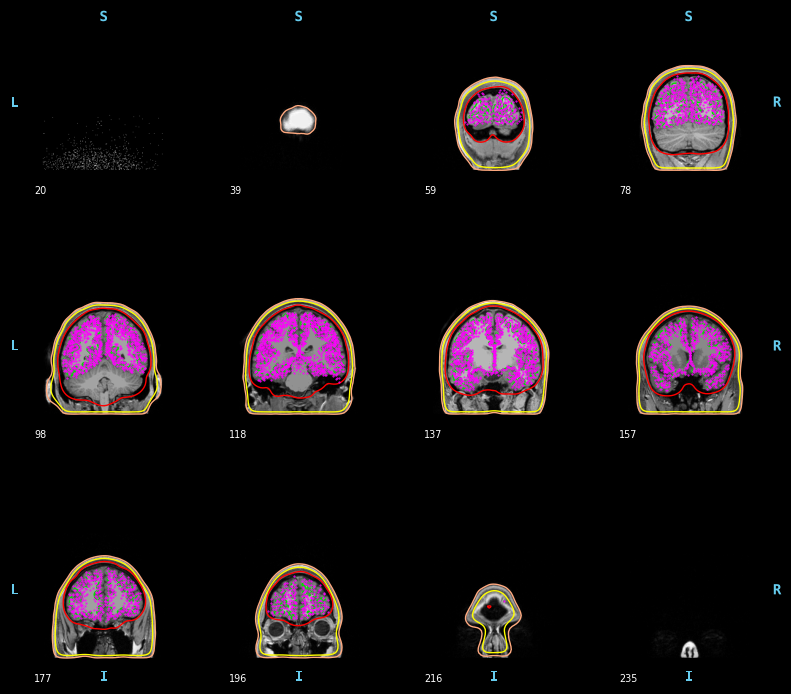

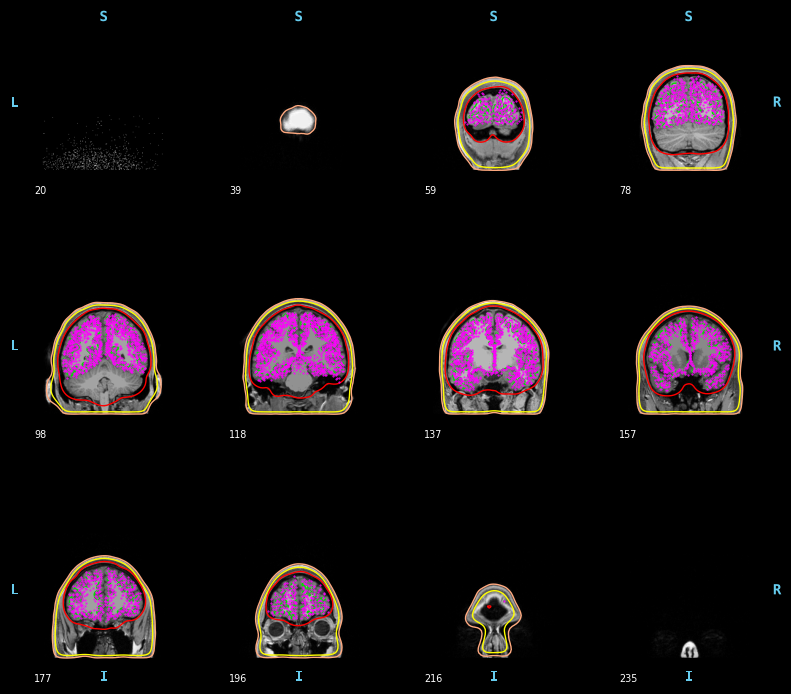

In [4]:
src = mne.read_source_spaces(subjects_dir+'/%s/bem/%s-ico4-src.fif' %(subject,subject))
# Plot the bem with the sources
mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir,brain_surfaces='white',
src=src, orientation='coronal')

In [5]:
## Create the bem solution.
conductivity = (0.3,) # for single layer

bem_model = mne.make_bem_model(subject=subject,ico=4,conductivity=conductivity,subjects_dir=subjects_dir)



Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
inner skull CM is   0.92  -2.09 -11.14 mm
Surfaces passed the basic topology checks.
Complete.



In [6]:
# Load the BEM surfaces from the generated .fif file
#bem_model = mne.read_bem_surfaces(fif_path)

#Make solutions
bem = mne.make_bem_solution(bem_model)
mne.write_bem_solution(subjects_dir+'/%s/bem/%s-inner-skull.bem.fif' %(subject,subject),bem, overwrite=True)

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.
Overwriting existing file.


In [7]:
bem = mne.read_bem_solution(subjects_dir+'/%s/bem/%s-inner-skull.bem.fif' %(subject,subject))

Loading surfaces...

Loading the solution matrix...

Homogeneous model surface loaded.
Loaded linear collocation BEM solution from C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\bem\sub-0037-inner-skull.bem.fif


We now have the necessary input to compute the forward solution operator. (Bear in mind that this will compute an operator and not apply it to the measurements to get the source time series.)

In [8]:
fwd = mne.make_forward_solution(r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\meg\Sub-0037\sub-01_01-eyes-closed-raw.fif',
                                trans=r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\meg\%s\%s-trans.fif' %(subject,subject),
                                src=src,
                                bem=bem,
                                meg=True,
                                eeg=False,
                                ignore_ref=True)

mne.write_forward_solution(r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\meg\%s\%s-fwd.fif' %(subject,subject), 
                           fwd, 
                           overwrite=True, 
                           verbose=None)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=126910, n_used=2562>, <surface (rh), n_vertices=128713, n_used=2562>] MRI (surface RAS) coords, subject 'sub-0037', ~22.2 MB>
MRI -> head transform : C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\meg\sub-0037\sub-0037-trans.fif
Measurement data      : sub-01_01-eyes-closed-raw.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 5124 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999060  0.005683  0.042983      -0.24 mm
    -0.013875  0.981144  0.192780      10.85 mm
    -0.041076 -0.193195  0.980300      67.10 mm
     0.000000  0.000000  0.000000       1.00

Read 207 MEG channels from info
105 coil definitions read
Coordinate transformation: MEG device -> head
     0.990440 -0.137012  0.016000      -1.48 mm
     0.126928  0.950617  0.283226      26.76 mm
 

The number of modeled sources are 5124, there is 2562 source in each hemisphere

In [10]:
mag_map = mne.sensitivity_map(fwd, ch_type='mag',mode='free')
mag_map.save(r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\meg\%s\%s_sensitivity-free' %(subject,subject), overwrite=True)

    207 out of 207 channels remain after picking
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]


In [ ]:
brainmap = mag_map.plot(time_label='Magnetometer Sensitivity', subjects_dir=subjects_dir,clim=dict(lims=[0,50,100]),hemi='split')

We can now visualise the sensitivity map on both hemispheres

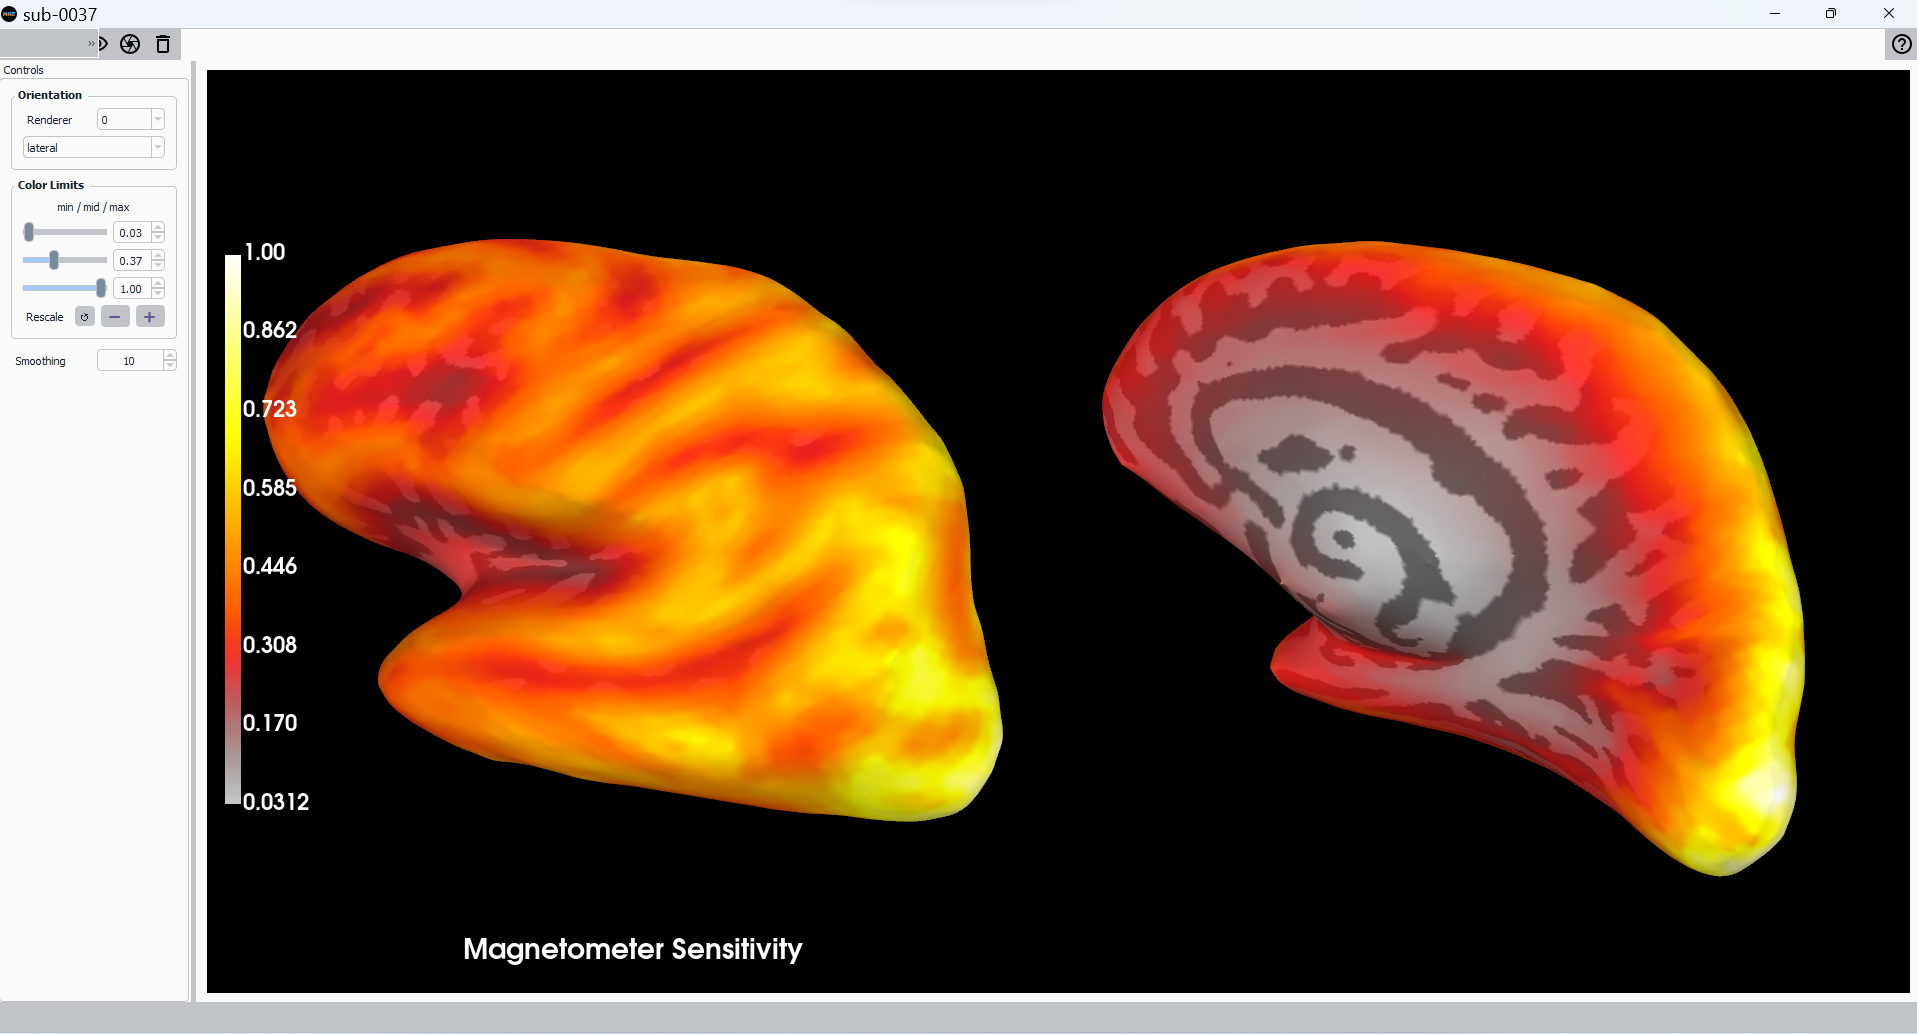